In [1]:
import numpy as np
import pandas as pd


In [3]:
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [5]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])


In [6]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

/tmp/ipykernel_5268/694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [7]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [9]:
x = df.iloc[:,1:3]
y = df.iloc[:,0]

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)


/tmp/ipykernel_5268/2284942141.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


Text(0.5, 1.0, 'Age QQ Plot')

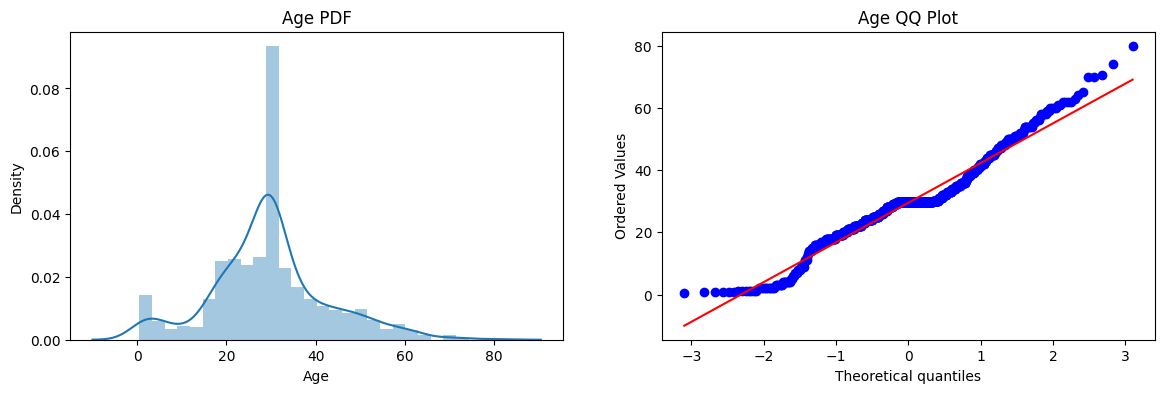

In [15]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title("Age QQ Plot")

/tmp/ipykernel_5268/930803170.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


Text(0.5, 1.0, 'Fare QQ Plot')

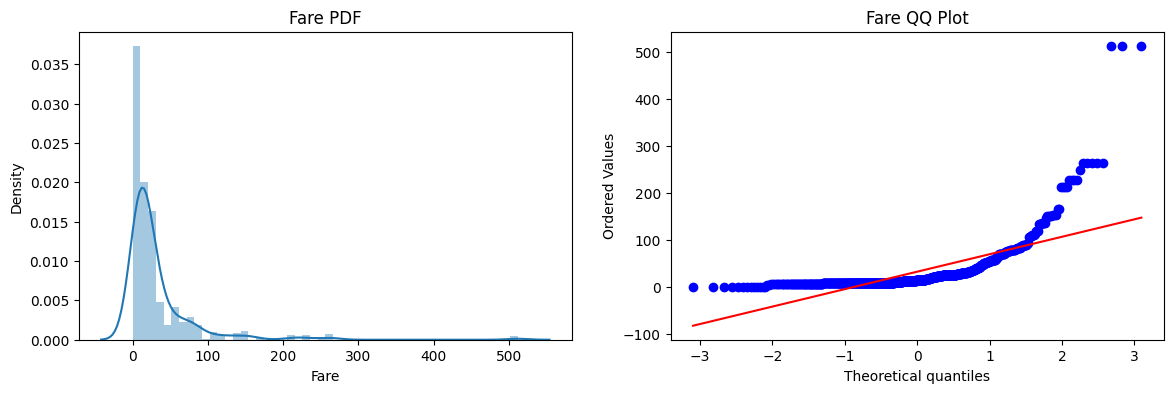

In [17]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title("Fare PDF")

plt.subplot(122)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title("Fare QQ Plot")

In [18]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [21]:
clf.fit(X_train,Y_train)
clf2.fit(X_train,Y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

In [22]:
print("Aaccuracy LR", accuracy_score(Y_test,y_pred))
print("Aaccuracy DT", accuracy_score(Y_test,y_pred1))

Aaccuracy LR 0.6480446927374302
Aaccuracy DT 0.6759776536312849


Now , applying function transformer

In [23]:
trf = FunctionTransformer(func=np.log1p)

In [24]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)


In [27]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,Y_train)
clf2.fit(X_train_transformed,Y_train)

y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)




In [28]:
print("Aaccuracy LR", accuracy_score(Y_test,y_pred))
print("Aaccuracy DT", accuracy_score(Y_test,y_pred1))


Aaccuracy LR 0.6815642458100558
Aaccuracy DT 0.6759776536312849
